In [1]:
from syllog_model import SyllogPyroModel

In [2]:
with open('icecream.json', 'r') as jsonfile:
    cyjson=jsonfile.read().replace('\n', '')

In [3]:
model = SyllogPyroModel.from_cyjson(cyjson)

In [4]:
model.plot_graph('icecream2.png')

In [5]:
model.get_factor_descriptions()

{'b': {'fn': 'Normal', 'inputs': ['mu', 'sigma'], 'outputs': ['c']},
 'z': {'fn': 'CategoricalOutcome',
  'inputs': ['outcome_mat', 'category'],
  'outputs': ['i']},
 'f': {'fn': 'CategoricalOutcome',
  'inputs': ['outcome_mat', 'category'],
  'outputs': ['i']},
 's': {'fn': 'Bernoulli', 'inputs': ['p'], 'outputs': ['t']}}

In [6]:
model.get_evidence_nodes()

['temp_mean_mat', 'temp_var_mat', 'cloud_prob']

In [7]:
import torch.distributions as dist
import torch

In [8]:
def Normal(mu, sigma):
    return {'c': dist.Normal(mu, sigma).sample() }
def Bernoulli(p):
    return {'t': dist.Bernoulli(p).sample() }
def CategoricalOutcome(outcome_mat, category):
    return { 'i': outcome_mat[torch.tensor(category).int()] }

factor_functions = { 'Normal': Normal, 'Bernoulli': Bernoulli, 'CategoricalOutcome': CategoricalOutcome }

In [9]:
evidence = {'temp_mean_mat': [75, 55], 'temp_var_mat': [10,15], 'cloud_prob': 0.3}

In [22]:
samples = [model(evidence, factor_functions)['temp'] for i in range(1000)]

/home/wgoldie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [23]:
import matplotlib.pyplot as plt

(array([ 2.,  0.,  1.,  0.,  0.,  2.,  2.,  2.,  4.,  3.,  7.,  9.,  4.,
        15.,  6.,  9., 13., 16., 16.,  9., 11., 22., 21., 18., 26., 32.,
        38., 30., 41., 60., 57., 43., 64., 65., 40., 51., 55., 36., 43.,
        36., 26., 20., 11., 15.,  4.,  4.,  3.,  4.,  2.,  2.]),
 array([ 12.468098,  14.327235,  16.186373,  18.04551 ,  19.904648,
         21.763784,  23.622921,  25.48206 ,  27.341196,  29.200335,
         31.059471,  32.91861 ,  34.777744,  36.636883,  38.49602 ,
         40.355156,  42.214294,  44.073433,  45.93257 ,  47.791706,
         49.650845,  51.509983,  53.369118,  55.228256,  57.087395,
         58.946533,  60.805668,  62.664806,  64.52394 ,  66.38308 ,
         68.24222 ,  70.10136 ,  71.960495,  73.81963 ,  75.678764,
         77.5379  ,  79.39704 ,  81.25618 ,  83.11532 ,  84.97446 ,
         86.83359 ,  88.692726,  90.551865,  92.411   ,  94.27014 ,
         96.12928 ,  97.98842 ,  99.84755 , 101.70669 , 103.56583 ,
        105.424965], dtype=float32),

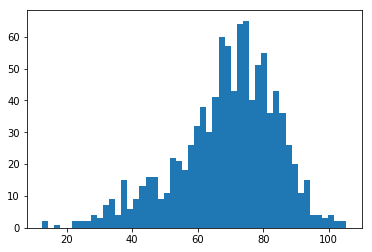

In [25]:
plt.hist(samples, bins=50)